# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


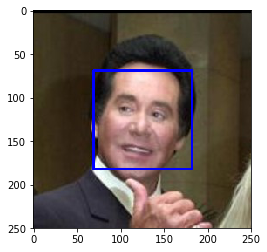

In [34]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline 



# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale

def face_detect(img,cascade):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = cascade.detectMultiScale(gray)

    # print number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # get bounding box for each detected face
    for (x,y,w,h) in faces:
        # add bounding box to color image
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()
    
    
face_detect(img,face_cascade)

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [9]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

Number of faces in human  (lfw) detected: 981 of 1000, Percent = 98.10%

Number of faces in dog (dogImages) detected: 98 of 1000, Percent = 9.80%

In [21]:
from tqdm import tqdm_notebook as tqdm

human_files_short = human_files[:1000]
dog_files_short = dog_files[:1000]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

humans_counts = np.sum([face_detector(i) for i in tqdm(human_files_short)])
dogs_humans_counts = np.sum([face_detector(i) for i in tqdm(dog_files_short)])

# calculate and print percentage of faces in each sets
print('Number of faces in human  (lfw) detected: %s of 1000, Percent = %.2f%%'%(humans_counts,(humans_counts/10)))
print('Number of faces in dog (dogImages) detected: %s of 1000, Percent = %.2f%%'%(dogs_humans_counts,(dogs_humans_counts/10)))



Number of faces in human  (lfw) detected: 981 of 1000, Percent = 98.10%
Number of faces in dog (dogImages) detected: 98 of 1000, Percent = 9.80%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

Found some opencv detectors here:
[Opencv detectors](https://www.quora.com/List-of-algorithms-used-for-face-detection-in-open-cv)
decided to use "Local Binary patterns histograms"

[Referred here to implement LBP](https://github.com/informramiz/Face-Detection-OpenCV/blob/master/Face-Detection.ipynb)


In [28]:
!wget https://raw.githubusercontent.com/informramiz/Face-Detection-OpenCV/master/data/lbpcascade_frontalface.xml

--2019-03-14 07:54:09--  https://raw.githubusercontent.com/informramiz/Face-Detection-OpenCV/master/data/lbpcascade_frontalface.xml
Resolving raw.githubusercontent.com... 151.101.200.133
Connecting to raw.githubusercontent.com|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50351 (49K) [text/plain]
Saving to: “lbpcascade_frontalface.xml”

100%[======================================>] 50,351      --.-K/s   in 0.002s  

2019-03-14 07:54:09 (29.2 MB/s) - “lbpcascade_frontalface.xml” saved [50351/50351]



In [29]:
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml') 
    
def local_bin_pat_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = lbp_face_cascade.detectMultiScale(gray,minNeighbors=5)
    return len(faces) > 0

humans_counts = np.sum([local_bin_pat_detector(i) for i in tqdm(human_files_short)])
dogs_humans_counts = np.sum([local_bin_pat_detector(i) for i in tqdm(dog_files_short)])

# calculate and print percentage of faces in each sets
print('Number of faces in human  (lfw) detected: %s of 1000, Percent = %.2f%%'%(humans_counts,humans_counts/10))
print('Number of faces in dog (dogImages) detected: %s of 1000, Percent = %.2f%%'%(dogs_humans_counts,dogs_humans_counts/10))


Number of faces in human  (lfw) detected: 918 of 1000, Percent = 91.80%
Number of faces in dog (dogImages) detected: 107 of 1000, Percent = 10.70%


- Testing LBP n HAAR
- both seem to do well

Number of faces detected: 1


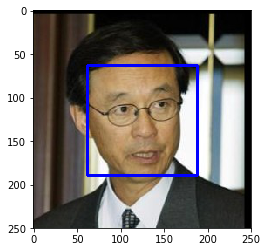

In [35]:
img = cv2.imread(human_files[1])
face_detect(img, face_cascade)

Number of faces detected: 1


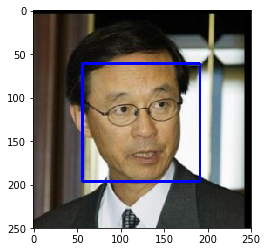

In [37]:
img = cv2.imread(human_files[1])
face_detect(img, lbp_face_cascade)

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [38]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/ahemf/.torch/models/vgg16-397923af.pth
553433881it [00:05, 104131477.18it/s]


In [39]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [49]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def image_to_tensor(image):
    ''' Scales, crops, and normalizes a image for a PyTorch model,
        returns an tensor array

    As per Pytorch documentations: All pre-trained models expect input images normalized in the same way, 
    of shape (3 x H x W), where H and W are expected to be at least 224. 
    The images have to be loaded in to a range of [0, 1] and 
    then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 
    
    '''
    prediction_transforms = transforms.Compose([transforms.Resize(256),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.485, 0.456, 0.406],
                                                               [0.229, 0.224, 0.225])])
    
    img_pil = Image.open( image ).convert('RGB')
    img_tensor = prediction_transforms( img_pil )[:3,:,:].unsqueeze(0)
    
    return img_tensor


# helper function for un-normalizing an image  - from STYLE TRANSFER exercise
# and converting it from a Tensor image to a NumPy image for display
def tensor_display(tensor):
    """ Display a tensor as an image. """
    
    import seaborn as sns
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
    print(image.shape)
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
    sns.heatmap(image[:,:,0],robust=True,annot=False,linewidths=0,ax=ax1)
    sns.heatmap(image[:,:,1],robust=True,annot=False,linewidths=0,ax=ax2)
    sns.heatmap(image[:,:,2],robust=True,annot=False,linewidths=0,ax=ax3)
    plt.show()
    return image

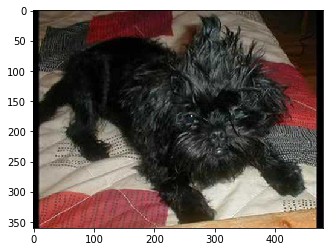

In [45]:
test_dog_image = 'dogImages/train/001.Affenpinscher/Affenpinscher_00002.jpg'
dog_image = Image.open(test_dog_image)
plt.imshow(dog_image)
plt.show()

torch.Size([1, 3, 224, 224])
(224, 224, 3)


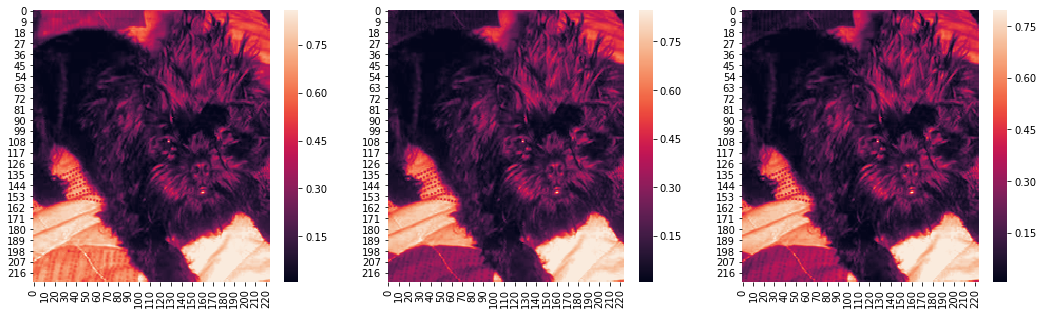

In [52]:
test_tensor = image_to_tensor( test_dog_image )
print(test_tensor.shape)
tensor_display(test_tensor);

In [53]:


def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img_tensor = image_to_tensor(img_path)
    # ----------------------------------

    VGG16.eval() # ------------- put model in evaluation mode ----------------

    # if GPU available, move model inputs to GPU
    if use_cuda:
        img_tensor = img_tensor.cuda()
        VGG16.cuda()
            
    # get sample outputs
    with torch.no_grad():
        output = VGG16(img_tensor)
        prediction = torch.argmax(output).item()
    VGG16.train()
    
    return prediction

In [58]:
print("predicted class id : ", VGG16_predict(test_dog_image ))
import os
import ast
import requests
CONST_FILE_TXT = "imagenet1000_clsid_to_human.txt"
CONST_FILE_URL = "https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/raw/c2c91c8e767d04621020c30ed31192724b863041/imagenet1000_clsid_to_human.txt"

def get_label_from_class_id(class_id):
    labels = {}
    if os.path.isfile( CONST_FILE_TXT ):
        fh = open( CONST_FILE_TXT , "r")
        labels = ast.literal_eval( fh.read() )
    else:
        labels = ast.literal_eval( requests.get( CONST_FILE_URL ).text )

    return labels[class_id]

get_label_from_class_id(VGG16_predict(test_dog_image ))

predicted class id :  252


'affenpinscher, monkey pinscher, monkey dog'

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [59]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    prediction = VGG16_predict(img_path)
    return True if 151 <= prediction <= 268 else False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

- 0% of the first 100 images where humans detected as a dog
- 99% of the first 100 images where dogs detected as a dog

Seems a good perf


In [60]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [61]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_as_dog_percent = sum( [dog_detector(image) for image in tqdm(human_files_short)] )
dog_as_dog_percent = sum( [dog_detector(image) for image in tqdm(dog_files_short)] )

print("Percentage of 100 first images where humans detected as a dog: %s"%(human_as_dog_percent))
print("Percentage of 100 first images where dogs detected as a dog:   %s"%(dog_as_dog_percent))

Percentage of 100 first images where humans detected as a dog: 0
Percentage of 100 first images where dogs detected as a dog:   99


Lets check for 1st 1000

In [62]:
human_files_short = human_files[:1000]
dog_files_short = dog_files[:1000]

human_as_dog_percent = sum( [dog_detector(image) for image in tqdm(human_files_short)] )
dog_as_dog_percent = sum( [dog_detector(image) for image in tqdm(dog_files_short)] )

print("Percentage of 1000 first images where humans detected as a dog: %s"%(human_as_dog_percent/10))
print("Percentage of 1000 first images where dogs detected as a dog:   %s"%(dog_as_dog_percent/10))

Percentage of 1000 first images where humans detected as a dog: 0.2
Percentage of 1000 first images where dogs detected as a dog:   98.4


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [66]:
# define VGG16 model
InceptionV3 = models.inception_v3(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    InceptionV3 = InceptionV3.cuda()

def Inception_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img_tensor = image_to_tensor(img_path)
    # ----------------------------------

    InceptionV3.eval() # ------------- put model in evaluation mode ----------------

    # if GPU available, move model inputs to GPU
    if use_cuda:
        img_tensor = img_tensor.cuda()
        InceptionV3.cuda()
            
    # get sample outputs
    with torch.no_grad():
        output = InceptionV3(img_tensor)
        prediction = torch.argmax(output).item()
    InceptionV3.train()
    
    return prediction



Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /home/ahemf/.torch/models/inception_v3_google-1a9a5a14.pth
108857766it [00:01, 99843202.00it/s] 


In [67]:
def dog_detector_inception(img_path):
    ## TODO: Complete the function.
    
    prediction = Inception_predict(img_path)
    return True if 151 <= prediction <= 268 else False

In [68]:
human_files_short = human_files[:1000]
dog_files_short = dog_files[:1000]

human_as_dog_percent = sum( [dog_detector_inception(image) for image in tqdm(human_files_short)] )
dog_as_dog_percent = sum( [dog_detector_inception(image) for image in tqdm(dog_files_short)] )

print("Inception Percentage of 1000 first images where humans detected as a dog: %s"%(human_as_dog_percent/10))
print("Inception Percentage of 1000 first images where dogs detected as a dog:   %s"%(dog_as_dog_percent/10))

Inception Percentage of 1000 first images where humans detected as a dog: 2.4
Inception Percentage of 1000 first images where dogs detected as a dog:   98.4


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!



In [70]:
dog_files_train = np.array(glob("dogImages/train/*/*"))
print('Train dog images %s' % len(dog_files_train))

dog_files_test = np.array(glob("dogImages/test/*/*"))
print('Test dog images %s' % len(dog_files_test))

dog_files_valid = np.array(glob("dogImages/valid/*/*"))
print('Validation dog images %s' % len(dog_files_valid))

Train dog images 6680
Test dog images 836
Validation dog images 835


In [168]:
import os
from torchvision import datasets

train_transforms = transforms.Compose([transforms.Resize(234),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.CenterCrop(224),
                                       transforms.ColorJitter(0.02,0.02,0.02),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(234),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


# pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder( 'dogImages/train', transform=train_transforms )
test_data = datasets.ImageFolder( 'dogImages/test', transform=test_transforms )
valid_data = datasets.ImageFolder( 'dogImages/valid', transform=test_transforms )

# ---- print out some data stats ----
print('  Number of train images: ', len(train_data))
print('  Number of test images:  ', len(test_data))
print('  Number of valid images: ', len(valid_data))
# -----------------------------------

trainloader = torch.utils.data.DataLoader( train_data, batch_size=256, shuffle=True )
testloader = torch.utils.data.DataLoader( test_data, batch_size=16)
validloader = torch.utils.data.DataLoader( valid_data, batch_size=512)

# create dictionary for all loaders in one
loaders_scratch = {}
loaders_scratch['train'] = trainloader
loaders_scratch['valid'] = validloader
loaders_scratch['test'] = testloader

print("done.")

  Number of train images:  6680
  Number of test images:   836
  Number of valid images:  835
done.


In [169]:
# get classes of training datas
class_names = train_data.classes
number_classes = len(class_names)

# correct output-size of the CNN
param_output_size = len(class_names)

print("number of classes:", number_classes)


number of classes: 133


Text(0.5, 1.0, '001.Affenpinscher')

Text(0.5, 1.0, '001.Affenpinscher')

Text(0.5, 1.0, '001.Affenpinscher')

Text(0.5, 1.0, '001.Affenpinscher')

Text(0.5, 1.0, '001.Affenpinscher')

Text(0.5, 1.0, '001.Affenpinscher')

Text(0.5, 1.0, '001.Affenpinscher')

Text(0.5, 1.0, '001.Affenpinscher')

Text(0.5, 1.0, '002.Afghan_hound')

Text(0.5, 1.0, '002.Afghan_hound')

Text(0.5, 1.0, '002.Afghan_hound')

Text(0.5, 1.0, '002.Afghan_hound')

Text(0.5, 1.0, '002.Afghan_hound')

Text(0.5, 1.0, '002.Afghan_hound')

Text(0.5, 1.0, '002.Afghan_hound')

Text(0.5, 1.0, '002.Afghan_hound')

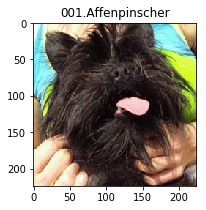

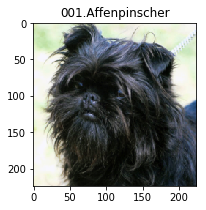

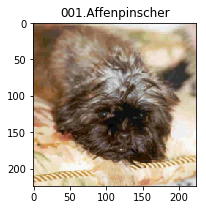

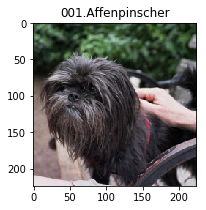

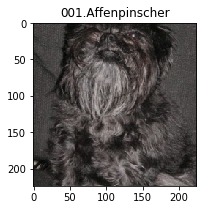

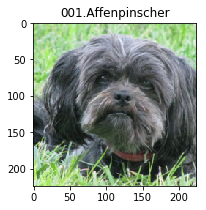

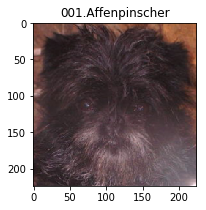

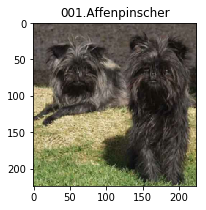

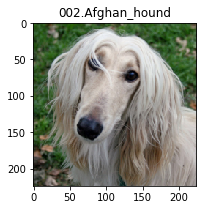

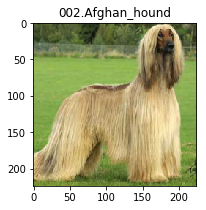

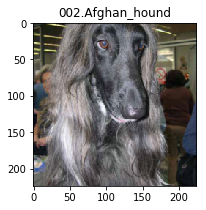

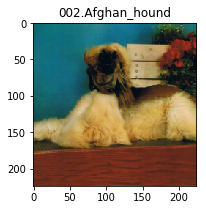

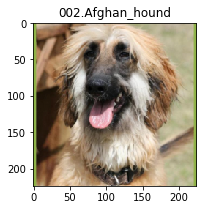

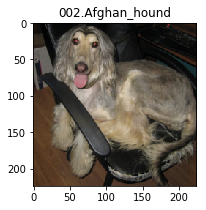

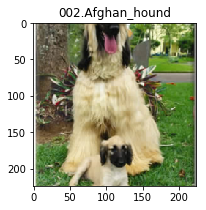

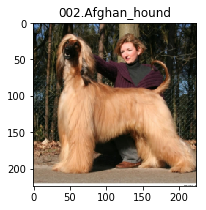

In [170]:
inputs, classes = next( iter(loaders_scratch['test']) )

for image, label in zip(inputs, classes): 
    image = image.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    # normalize image
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
     
    fig = plt.figure(figsize=(12,3))
    plt.imshow(image)
    plt.title(class_names[label])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
I loaded the training, test and validation datas, then I created DataLoaders for each of these sets of datas. 
I tried to approached the problem iteratively and starting with the examples from the previous labs, especially Cifar and MMNIST examples on my own laptop.

__Resizing__

The rescaling of the orignial image is necessary, because cropping a 224x224 image out of a much larger orignal is unlikely to contain the features we are interested in. Thus following the Simonyan et al. paper of VGG16 I rescaled the original images to 256x256 px before cropping.

I decided to follow the original VGG16 paper (Simonyan K, Zisserman A 2015), where the authors chose a 224x224 px image as input tensor, randomly cropped from a rescaled version of the orignal image.


I realized that the most of the pretrained models require the input to be 224x224 pixel images. Also, I'll need to match the normalization used when the models were trained. From reading pytorch docs, I saw that each color channel has to normalized separately, the means are [0.485, 0.456, 0.406] and the standard deviations are [0.229, 0.224, 0.225].


__Data Augmentation__

I chose to augment the image data by random rotation up to 10 degrees and by random horizontal flipping. I also added vertical flip, and finally ColorJitter so that it mimics bad cameras/dark photos. Data augmentation is an easy way to extend a dataset and improve generalization when training the model.

**References**: I think this should be added to Udacity course material

[Does Transforms Increase Dataset Size?](https://stackoverflow.com/questions/51677788/data-augmentation-in-pytorch)

[ColorJitter](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ColorJitter)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

#### Non Working Models

In [90]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(16, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 512, kernel_size=3, padding=1)
        self.last_layer = 32
        self.conv4 = nn.Conv2d(512, self.last_layer, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(28*28*self.last_layer, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout_1 = nn.Dropout(0.3)
        self.dropout_2 = nn.Dropout(0.1)
        self.batch_norm = nn.BatchNorm1d(num_features=512)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        # 224*224*16
        x = self.pool(F.relu(self.conv2(x)))
        # 112*112*128
        x = self.pool(F.relu(self.conv3(x)))
        # 56*56*512
        x2 = self.pool(F.relu(self.conv5(x)))
        # 28*28*16
        x = self.pool(F.relu(self.conv4(x)))
        # 28*28*32
        
        
        
        x = x.view(-1, 28*28*self.last_layer)
        x2 = x2.view(-1, 28*28*16)
        
        x=x+x2
        x=F.relu(x)
        
        x = F.relu(self.batch_norm(self.fc1(x)))
        x = self.dropout_1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout_2(x)
        x = self.fc3(x)
        return x


#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Arch 1 failed to converge so tried a different config
```
Starting Epoch 1
Epoch: 1 	Training Loss: 4.699150 	Validation Loss: 4.983757
Validation Accuracy:  0% ( 7/835)
  Saving model ...
Starting Epoch 2
Epoch: 2 	Training Loss: 4.617527 	Validation Loss: 5.195993
Validation Accuracy:  0% ( 8/835)
Breaking for EarlyStopping
```

In [102]:
# arch 2
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(7*7*256, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        # 112*112
        x = self.pool(F.relu(self.conv2(x)))
        # 56*56
        x = self.pool(F.relu(self.conv3(x)))
        # 28*28
        x = self.pool(F.relu(self.conv4(x)))
        # 14*14
        x = self.pool(F.relu(self.conv5(x)))
        # 7*7*256
        x = x.view(-1, 7*7*256)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

```
Starting Epoch 1
Epoch: 1 	Training Loss: 4.901977 	Validation Loss: 4.876223
Validation Accuracy:  0% ( 8/835)
  Saving model ...
Starting Epoch 2
Epoch: 2 	Training Loss: 4.873429 	Validation Loss: 4.875726
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Starting Epoch 3
Epoch: 3 	Training Loss: 4.870934 	Validation Loss: 4.878145
Validation Accuracy:  1% ( 9/835)
Breaking for EarlyStopping
```

In [110]:
# arch 3

import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(25088, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 25088)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

```
Starting Epoch 1
Epoch: 1 	Training Loss: 5.779167 	Validation Loss: 4.875971
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Starting Epoch 2
Epoch: 2 	Training Loss: 4.872804 	Validation Loss: 4.875210
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Starting Epoch 3
Epoch: 3 	Training Loss: 4.869922 	Validation Loss: 4.875118
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Starting Epoch 4
Epoch: 4 	Training Loss: 4.868905 	Validation Loss: 4.875096
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Starting Epoch 5
Epoch: 5 	Training Loss: 4.868475 	Validation Loss: 4.875261
Validation Accuracy:  1% ( 9/835)
Starting Epoch 6
Epoch: 6 	Training Loss: 4.868065 	Validation Loss: 4.875639
Validation Accuracy:  1% ( 9/835)
Starting Epoch 7
Epoch: 7 	Training Loss: 4.868010 	Validation Loss: 4.875777
Validation Accuracy:  1% ( 9/835)
Breaking for EarlyStopping
```

In [116]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(25088, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.5)
        
        self.shortcut = nn.Sequential()
        
        self.shortcut.add_module(
            'conv',
            nn.Conv2d(
                64,
                256,
                kernel_size=1,
                stride=1,  # downsample
                padding=0,
                bias=False))
        self.shortcut.add_module('bn', nn.BatchNorm2d(256))
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        # 112*112
        xshort = self.pool(F.relu(self.pool(F.relu(self.shortcut(x)))))
        
        x = self.pool(F.relu(self.conv2(x)))
        # 56*56
        x = self.pool(F.relu(self.conv3(x)))
        # 28*28
        
        x=x+xshort
        x=F.relu(x)
        
        x = self.pool(F.relu(self.conv4(x)))
        # 14*14
        
        
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 25088)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

LR=0.002

```

Starting Epoch 1
Epoch: 1 	Training Loss: 5.244071 	Validation Loss: 4.876943
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Starting Epoch 2
Epoch: 2 	Training Loss: 4.873156 	Validation Loss: 4.876290
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Starting Epoch 3
Epoch: 3 	Training Loss: 4.871405 	Validation Loss: 4.875708
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Starting Epoch 4
Epoch: 4 	Training Loss: 4.869188 	Validation Loss: 4.876251
Validation Accuracy:  1% ( 9/835)
```

In [126]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(25088, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.4)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 25088)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

changed batch size to 128 after no progress

```
Starting Epoch 1
Epoch: 1 	Training Loss: 4.891189 	Validation Loss: 4.881102
Validation Accuracy:  1% (12/835)
  Saving model ...
Starting Epoch 2
Epoch: 2 	Training Loss: 4.810431 	Validation Loss: 4.926458
Validation Accuracy:  1% (12/835)
Starting Epoch 3
Epoch: 3 	Training Loss: 4.654658 	Validation Loss: 4.844351
Validation Accuracy:  1% (14/835)
  Saving model ...
Starting Epoch 4
Epoch: 5 	Training Loss: 4.415219 	Validation Loss: 5.031903
Validation Accuracy:  1% (14/835)
Starting Epoch 6
Epoch: 6 	Training Loss: 4.345246 	Validation Loss: 5.073033
Validation Accuracy:  2% (19/835)
Breaking for EarlyStopping
```

In [131]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(128, 128, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=7, padding=3)
        self.conv4 = nn.Conv2d(128, 184, kernel_size=3, padding=1) # Residual
        self.conv5 = nn.Conv2d(184, 184, kernel_size=5, padding=2)
        self.conv6 = nn.Conv2d(184, 184, kernel_size=7, padding=3)
        self.conv7 = nn.Conv2d(184, 256, kernel_size=3, padding=1) # Residual
        self.conv8 = nn.Conv2d(256, 256, kernel_size=5, padding=2)
        self.conv9 = nn.Conv2d(256, 256, kernel_size=7, padding=3)
        self.conv10 = nn.Conv2d(256, 384, kernel_size=3, padding=1) # Residual
        self.conv11 = nn.Conv2d(384, 384, kernel_size=5, padding=2)
        self.conv12 = nn.Conv2d(384, 384, kernel_size=7, padding=3)
        self.conv13 = nn.Conv2d(384, 432, kernel_size=3, padding=1) # Residual
        self.conv14 = nn.Conv2d(432, 432, kernel_size=3, padding=1)
        self.conv15 = nn.Conv2d(432, 432, kernel_size=3, padding=1)
        self.conv16 = nn.Conv2d(432, 512, kernel_size=3, padding=1) # Residual
        
        # s1
        self.shortcut = nn.Sequential()
        
        
        #s2
        self.shortcut_2 = nn.Sequential()
        
        
        #s3
        self.shortcut_3 = nn.Sequential()
        
        
        #s4
        self.shortcut_4 = nn.Sequential()
        
        
        #s5
        self.shortcut_5 = nn.Sequential()
        
        
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(25088, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.5)
        self.dropout_2 = nn.Dropout(0.2)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.conv1(x))
        xshort = F.relu(self.shortcut(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x=x+xshort
        x=F.relu(x)
        x = self.pool(F.relu(self.conv4(x)))
        # x=112*112
        
        xshort_2 = F.relu(self.shortcut_2(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x=x+xshort_2
        x=F.relu(x)
        x = self.pool(F.relu(self.conv7(x)))
        # x = 56*56
        
        xshort_3 = F.relu(self.shortcut_3(x))
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x=x+xshort_3
        x=F.relu(x)
        x = self.pool(F.relu(self.conv10(x)))
        # x = 28*28
        
        xshort_4 = F.relu(self.shortcut_4(x))
        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))
        x=x+xshort_4
        x=F.relu(x)
        x = self.pool(F.relu(self.conv13(x)))
        # x = 14*14
        
        xshort_5 = F.relu(self.shortcut_5(x))
        x = F.relu(self.conv14(x))
        x = F.relu(self.conv15(x))
        x=x+xshort_5
        x=F.relu(x)
        x = self.pool(F.relu(self.conv16(x)))
        # x=7*7
        
        
        
        x = x.view(-1, 25088)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout_2(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [143]:
# Resnet 2 smaller version

import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 96, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(96, 96, kernel_size=7, padding=3)
        self.conv3 = nn.Conv2d(96, 150, kernel_size=3, padding=1) # Residual
        
        self.conv4 = nn.Conv2d(150, 150, kernel_size=7, padding=3) 
        self.conv5 = nn.Conv2d(150, 196, kernel_size=3, padding=1) # Residual
        
        self.conv6 = nn.Conv2d(196, 196, kernel_size=7, padding=3)
        self.conv7 = nn.Conv2d(196, 256, kernel_size=3, padding=1) # Residual
        
        self.conv8 = nn.Conv2d(256, 256, kernel_size=7, padding=3)
        self.conv9 = nn.Conv2d(256, 324, kernel_size=3, padding=1) # Residual
        
        
        # s1
        self.shortcut = nn.Sequential()
        
        
        #s2
        self.shortcut_2 = nn.Sequential()
        
        
        #s3
        self.shortcut_3 = nn.Sequential()
        
        
        #s4
        self.shortcut_4 = nn.Sequential()
        
        
        
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(324*7*7, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.5)
        self.dropout_2 = nn.Dropout(0.2)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.pool(F.relu(self.conv1(x)))
        xshort = self.shortcut(x)
        x = F.relu(self.conv2(x))
        x=x+xshort
        x=F.relu(x)
        x = self.pool(F.relu(self.conv3(x)))
        # x=56*56
        xshort_2 = self.shortcut_2(x)
        
        x = F.relu(self.conv4(x))
        x=x+xshort_2
        x=F.relu(x)
        x = self.pool(F.relu(self.conv5(x)))
        # x = 28*28
        
        xshort_3 = self.shortcut_3(x)
        x = F.relu(self.conv6(x))
        x=x+xshort_3
        x=F.relu(x)
        x = self.pool(F.relu(self.conv7(x)))
        # x = 14*14
        xshort_4 = self.shortcut_4(x)
        x = F.relu(self.conv8(x))
        x=x+xshort_4
        x=F.relu(x)
        x = self.pool(F.relu(self.conv9(x)))
        # x = 7*7
        
        
        
        x = x.view(-1, 324*7*7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout_2(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [159]:
# Reducing resnet further for runtime

# Resnet 2 smaller version

import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(128, 128, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(128, 196, kernel_size=3, padding=1) # Residual
        
        self.conv4 = nn.Conv2d(196, 196, kernel_size=5, padding=2) 
        self.conv5 = nn.Conv2d(196, 256, kernel_size=3, padding=1) # Residual
        
        
        
        # s1
        self.shortcut = nn.Sequential(nn.Conv2d(
                    128,
                    128,
                    kernel_size=1,
                    stride=2,  # downsample
                    padding=0,
                    bias=False))
        
        
        #s2
        self.shortcut_2 = nn.Sequential(nn.Conv2d(
                    196,
                    196,
                    kernel_size=1,
                    stride=2,  # downsample
                    padding=0,
                    bias=False))
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(256*7*7, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.5)
        self.dropout_2 = nn.Dropout(0.2)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.pool(F.relu(self.conv1(x)))
        # 112*112
        xshort = self.shortcut(x)
        x = self.pool(F.relu(self.conv2(x)))
        # x = 56*56
        x=x+xshort
        x=F.relu(x)
        x = self.pool(F.relu(self.conv3(x)))
        # x=28*28
        xshort_2 = self.shortcut_2(x)
        
        x = self.pool(F.relu(self.conv4(x)))
        # x = 14*14 
        x=x+xshort_2
        x=F.relu(x)
        x = self.pool(F.relu(self.conv5(x)))
        # x = 7*7
        
        
        
        
        x = x.view(-1, 256*7*7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout_2(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [174]:
# Smallest Working Resnet

# Resnet 3 smaller version

import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 96, kernel_size=3, padding=1,stride=2)
        self.conv2 = nn.Conv2d(96, 96, kernel_size=3, padding=1,stride=2)
        self.conv3 = nn.Conv2d(96, 128, kernel_size=3, padding=1) # Residual
        
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1) 
        self.conv5 = nn.Conv2d(128, 156, kernel_size=3, padding=1) # Residual
        
        
        
        # s1
        self.shortcut = nn.Sequential(nn.Conv2d(
                    96,
                    96,
                    kernel_size=1,
                    stride=2,  # downsample
                    padding=0,
                    bias=False))
        
        
        #s2
        self.shortcut_2 = nn.Sequential(nn.Conv2d(
                    128,
                    128,
                    kernel_size=1,
                    stride=2,  # downsample
                    padding=0,
                    bias=False))
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(156*7*7, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.4)
        self.dropout_2 = nn.Dropout(0.1)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = F.selu(self.conv1(x))
        # 112*112
        xshort = self.shortcut(x)
        x = F.selu(self.conv2(x))
        # x = 56*56
        x=x+xshort
        x=F.selu(x)
        x = self.pool(F.selu(self.conv3(x)))
        # x=28*28
        xshort_2 = self.shortcut_2(x)
        
        x = self.pool(F.selu(self.conv4(x)))
        # x = 14*14
        
        x=x+xshort_2
        x=F.selu(x)
        x = self.pool(F.selu(self.conv5(x)))
        # x = 7*7
        
        
        
        
        x = x.view(-1, 156*7*7)
        x = F.selu(self.fc1(x))
        x = self.dropout(x)
        x = F.selu(self.fc2(x))
        x = self.dropout_2(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Loss seemed decreasing but accuracy did not increase

```
Epoch: 1 	Training Loss: 743.963806 	Validation Loss: 25.807701
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Epoch: 2 	Training Loss: 34.006561 	Validation Loss: 19.554052
Validation Accuracy:  1% (10/835)
  Saving model ...
Epoch: 3 	Training Loss: 23.945196 	Validation Loss: 10.479988
Validation Accuracy:  0% ( 5/835)
  Saving model ...
Epoch: 4 	Training Loss: 9.735953 	Validation Loss: 5.471024
Validation Accuracy:  1% (10/835)
  Saving model ...
Epoch: 5 	Training Loss: 6.774884 	Validation Loss: 5.170122
Validation Accuracy:  0% ( 6/835)
  Saving model ...
```

#### Working Models

In [207]:
# Smallest Working Resnet

# Resnet 4 smaller version

import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1,stride=2)
        self.conv2 = nn.Conv2d(32, 48, kernel_size=3, padding=1,stride=2)
        self.conv3 = nn.Conv2d(48, 64, kernel_size=3, padding=1) 
        
        self.conv4 = nn.Conv2d(64, 96, kernel_size=3, padding=1) # Residual
        self.conv5 = nn.Conv2d(96, 128, kernel_size=3, padding=1)
        
        
        
        
        # s1
        self.shortcut = nn.Sequential(nn.Conv2d(
                    32,
                    64,
                    kernel_size=2,
                    stride=4,  # downsample
                    padding=0,
                    bias=False))
        
        
        
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(128*7*7, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.3)
        self.dropout_2 = nn.Dropout(0.1)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.conv1(x))
        # 112*112
        xshort = self.shortcut(x)
        x = F.relu(self.conv2(x))
        # x = 56*56
        
        x = self.pool(F.relu(self.conv3(x)))
        # x=28*28
        
        x=x+xshort
        x=F.relu(x)
        x = self.pool(F.relu(self.conv4(x)))
        # x = 14*14
        
        
        x = self.pool(F.relu(self.conv5(x)))
        # x = 7*7
        
        x = x.view(-1, 128*7*7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout_2(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

- Refer https://github.com/hysts/pytorch_resnet/blob/master/resnet.py for a Resnet implementation

- I am going to base my CNN on RESNET architecture
    - Tried multiple layers and resnet configurations
    - Solutions with too many layers do not seem  to decrease loss. I presume this is due to too many parameters and too less training exxamples.
- I finally used 5 layers too deep for a task like this, with 1 skip layer from layer 1 output to layer 4 input. 
- The train time of my model is quite small which is a good advantage.
- In my train function I used EarlyStopping to prevent overfit.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [208]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [209]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    total_images = (len(train_data))+(len(valid_data))
    print("Total images to iterate = %s"%(total_images))
    
    total_iters = total_images*n_epochs
    iters_with_no_progress = 0
    with tqdm(total=total_iters) as pbar:
        for epoch in range(1, n_epochs+1):
            # initialize variables to monitor training and validation loss
            train_loss = 0.0
            valid_loss = 0.0

            ###################
            # train the model #
            ###################
            model.train()
            for batch_idx, (data, target) in enumerate(loaders['train']):
                
                
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                    model.cuda()
                ## find the loss and update the model parameters accordingly
                ## record the average training loss, using something like
                ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

                optimizer.zero_grad()
                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # calculate the batch loss
                loss = criterion(output, target)
                # backward pass: compute gradient of the loss with respect to model parameters
                loss.backward()
                # perform a single optimization step (parameter update)
                optimizer.step()
                # update training loss
                #train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                pbar.update(target.shape[0])
                
                if np.isnan(train_loss):
                    print("Breaking for NaN training Loss")
                    break

            ######################    
            # validate the model #
            ######################
            correct = 0 
            total = 0
            model.eval()
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                with torch.no_grad():
                    output = model(data)
                    loss = criterion(output, target)
                    valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                    
                    pred = output.data.max(1, keepdim=True)[1]
                    # compare predictions to true label
                    correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
                    total += data.size(0)
                    pbar.update(target.shape[0])


            # print training/validation statistics 
            print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                epoch, 
                train_loss,
                valid_loss
                ))
            print('Validation Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

            ## TODO: save the model if validation loss has decreased
            if valid_loss <= valid_loss_min:
                print('  Saving model ...')
                torch.save(model.state_dict(), save_path)
                valid_loss_min = valid_loss
                iters_with_no_progress = 0
            else:
                iters_with_no_progress += 1
                if iters_with_no_progress >= 3 or np.isnan(valid_loss):
                    print("Breaking for EarlyStopping/Nan Validation Loss")
                    break
            
    # return trained model
    return model


# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
    
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Total images to iterate = 7515


Epoch: 1 	Training Loss: 4.875839 	Validation Loss: 4.855362
Validation Accuracy:  1% (11/835)
  Saving model ...
Epoch: 2 	Training Loss: 4.729691 	Validation Loss: 4.628291
Validation Accuracy:  3% (28/835)
  Saving model ...
Epoch: 3 	Training Loss: 4.530596 	Validation Loss: 4.495599
Validation Accuracy:  3% (30/835)
  Saving model ...
Epoch: 4 	Training Loss: 4.327029 	Validation Loss: 4.328666
Validation Accuracy:  4% (39/835)
  Saving model ...
Epoch: 5 	Training Loss: 4.166253 	Validation Loss: 4.217243
Validation Accuracy:  5% (47/835)
  Saving model ...
Epoch: 6 	Training Loss: 4.049343 	Validation Loss: 4.116697
Validation Accuracy:  7% (59/835)
  Saving model ...
Epoch: 7 	Training Loss: 3.966840 	Validation Loss: 4.053463
Validation Accuracy:  7% (65/835)
  Saving model ...
Epoch: 8 	Training Loss: 3.864593 	Validation Loss: 3.934957
Validation Accuracy:  8% (70/835)
  Saving model ...
Epoch: 9 	Training Loss: 3.780058 	Validation Loss: 3.887003
Validation Accuracy:  9% (7

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [211]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        output = F.softmax(output, dim=1)
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.708248


Test Accuracy: 13% (114/836)


### Trying Non Residual version of same network

In [235]:
# Smallest Working Resnet

# Resnet 4 smaller version

import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1,stride=2)
        self.conv2 = nn.Conv2d(32, 48, kernel_size=3, padding=1,stride=2)
        self.conv3 = nn.Conv2d(48, 64, kernel_size=3, padding=1) 
        
        self.conv4 = nn.Conv2d(64, 96, kernel_size=3, padding=1) # Residual
        self.conv5 = nn.Conv2d(96, 128, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(128*7*7, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.3)
        self.dropout_2 = nn.Dropout(0.1)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.conv1(x))
        # 112*112
        
        x = F.relu(self.conv2(x))
        # x = 56*56
        
        x = self.pool(F.relu(self.conv3(x)))
        # x=28*28
        
        
        x = self.pool(F.relu(self.conv4(x)))
        # x = 14*14
        
        
        x = self.pool(F.relu(self.conv5(x)))
        # x = 7*7
        
        x = x.view(-1, 128*7*7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout_2(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)


In [236]:
# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
    
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Total images to iterate = 7515


Epoch: 1 	Training Loss: 4.883212 	Validation Loss: 4.889841
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Epoch: 2 	Training Loss: 4.854826 	Validation Loss: 4.825721
Validation Accuracy:  1% ( 9/835)
  Saving model ...
Epoch: 3 	Training Loss: 4.706279 	Validation Loss: 4.692018
Validation Accuracy:  2% (21/835)
  Saving model ...
Epoch: 4 	Training Loss: 4.537510 	Validation Loss: 4.515999
Validation Accuracy:  3% (27/835)
  Saving model ...
Epoch: 5 	Training Loss: 4.360284 	Validation Loss: 4.321961
Validation Accuracy:  5% (44/835)
  Saving model ...
Epoch: 6 	Training Loss: 4.222256 	Validation Loss: 4.279711
Validation Accuracy:  4% (41/835)
  Saving model ...
Epoch: 7 	Training Loss: 4.098611 	Validation Loss: 4.189910
Validation Accuracy:  5% (45/835)
  Saving model ...
Epoch: 8 	Training Loss: 4.029220 	Validation Loss: 4.083462
Validation Accuracy:  7% (65/835)
  Saving model ...
Epoch: 9 	Training Loss: 3.919756 	Validation Loss: 4.059528
Validation Accuracy:  6% (5

In [237]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.881917


Test Accuracy:  9% (83/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [217]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [224]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.vgg16(pretrained=True)

# Freeze parameters of the model to avoid brackpropagation
for param in model_transfer.parameters():
    param.requires_grad = False

    
# Define dog breed classifier part of model_transfer
classifier = nn.Sequential(nn.Linear(25088, 512),
                           nn.ReLU(),
                           nn.Dropout(0.1),
                           nn.Linear(512, number_classes))

# Rplace the original classifier with the dog breed classifier from above
model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Since the VGG16 network was also trained on dogs, among other things, it contains useful high level feature information in the convolutional layers.

Hence I used the entire feature extractor part from the VGG16 pretrained model keeping the weights constant, to avoid overfitting when training on a small new dataset (~7000 dog images). I just replaced the classifier part with a new dog breed classifier.

The drog breed classifier is modeled along the original VGG16 calssifier with 2 fully connected layers instead of 3. I used lower dropout values since we have less number of examples and using 0.5 dropout will make the network take too long to converge.

I reconfigured num neurons in each layer as per the last DNN in section 1.5 where I made it from scratch.

**Why I did not use ResNet?**
- VGG16 gives good performance of ImageNet, Resnet yields only a little improvement, but adds huge computational cost
- I already used ResNet concept in section 1.5 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [225]:
criterion_transfer = nn.CrossEntropyLoss()

# only train the classifier! -> model_transfer.classifier.parameters()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)


I use adam since in 1.5 Adam worked pretty well. I also did not change the lr from last section

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [226]:
# train the model
model_transfer = train(2, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Total images to iterate = 7515


Epoch: 1 	Training Loss: 2.511720 	Validation Loss: 1.129330
Validation Accuracy: 66% (552/835)
  Saving model ...
Epoch: 2 	Training Loss: 0.652141 	Validation Loss: 0.818878
Validation Accuracy: 76% (636/835)
  Saving model ...


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [227]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.818089


Test Accuracy: 77% (647/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [230]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)

    # Define transformations of image
    preprocess = transforms.Compose([transforms.Resize(234),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
    # Preprocess image to 4D Tensor (.unsqueeze(0) adds a dimension)
    img_tensor = preprocess(img).unsqueeze_(0)

    # Move tensor to GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
        model_transfer.cuda()
        
    ## Inference
    # Turn on evaluation mode
    model_transfer.eval()
    
    # Get predicted category for image
    with torch.no_grad():
        output = model_transfer(img_tensor)
        prediction = torch.argmax(output).item()
        
    # Turn off evaluation mode
    model_transfer.train()
    
    # Use prediction to get dog breed
    breed = class_names[prediction]
    
    return breed


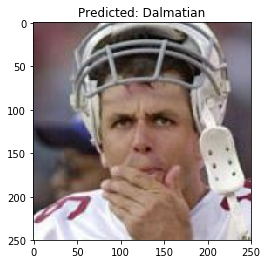

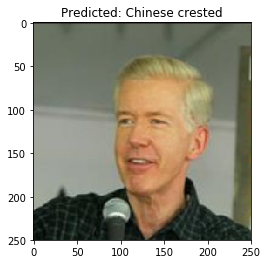

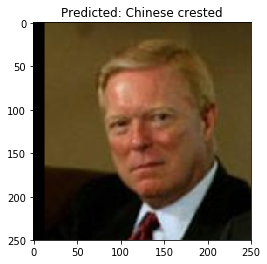

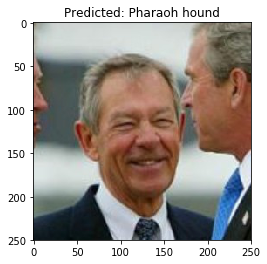

In [232]:
import random
def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()
    
# try out the function
for image in random.sample(list(human_files_short), 4): 
    predicted_breed = predict_breed_transfer(image)
    display_image(image, title="Predicted: {}".format(predicted_breed) )


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [233]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    # check if image has juman faces:
    if (face_detector(img_path)):
        print("Human Detected!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title="Predicted: {}".format(predicted_breed) )
        
        print("You look like a ...")
        print(predicted_breed)
        
    # check if image has dogs:
    elif dog_detector(img_path):
        print("Dog Detected!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title="Predicted: {}".format(predicted_breed) )
        
        print("Most likley Breed is ...")
        print(predicted_breed)
    # otherwise
    else:
        print("Oh, we're sorry! We couldn't detect any dog or human face in the image.")
        display_image(img_path, title="...")
        print("Try A Different Image!")
        


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

Its great. Especially being able to use transfer learning to solve hard problems with less data is amazing.

Points of improvement
- Learning Rate schedules and decay, its in Keras and helps training find better minimas
- Adversarial Training. or using labels other than dogs as an additional class.
- More image variations and more epochs
- For Pretrained network we can also train last few Conv Layers as well.



Human Detected!


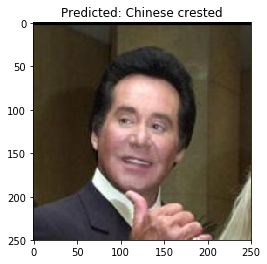

You look like a ...
Chinese crested


Human Detected!


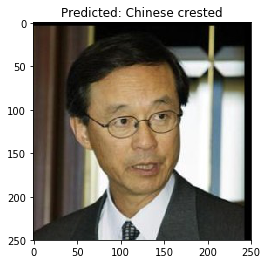

You look like a ...
Chinese crested


Human Detected!


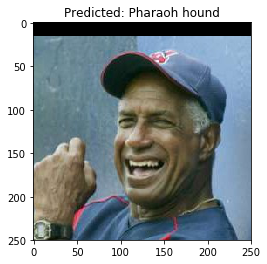

You look like a ...
Pharaoh hound


Human Detected!


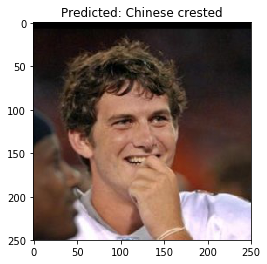

You look like a ...
Chinese crested


Human Detected!


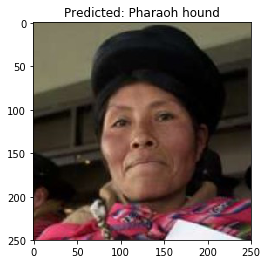

You look like a ...
Pharaoh hound


Human Detected!


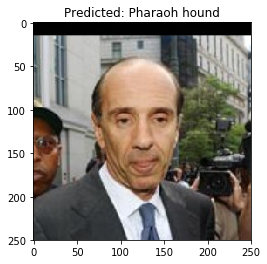

You look like a ...
Pharaoh hound


Human Detected!


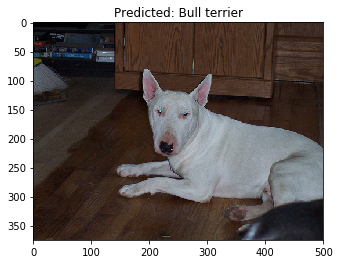

You look like a ...
Bull terrier


Dog Detected!


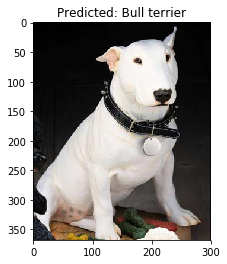

Most likley Breed is ...
Bull terrier


Dog Detected!


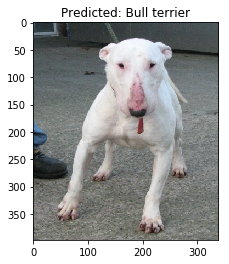

Most likley Breed is ...
Bull terrier


Dog Detected!


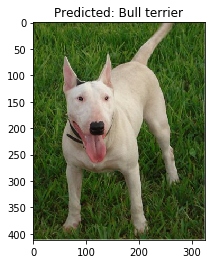

Most likley Breed is ...
Bull terrier


Dog Detected!


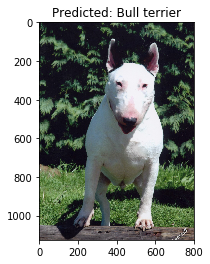

Most likley Breed is ...
Bull terrier


Dog Detected!


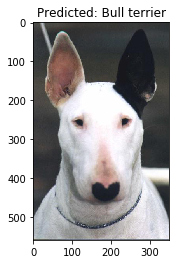

Most likley Breed is ...
Bull terrier




In [234]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:6], dog_files[:6])):
    run_app(file)